In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/smartphonecleaned_data.csv')

In [3]:
df.head()

,brand_name,has_5g,processor_brand,processor_speed,Battery,RAM,Storage,screen_size,num_rear_cameras,os,primary_camera_rear,primary_camera_front,price
0,oneplus,True,snapdragon,3.2,5000,12,256,6.7,3,android,50.0,16.0,54999
1,oneplus,True,snapdragon,2.2,5000,6,128,6.6,3,android,64.0,16.0,19989
2,samsung,True,exynos,2.4,5000,4,64,6.6,3,android,50.0,13.0,16499
3,motorola,True,snapdragon,2.2,5000,6,128,6.6,3,android,50.0,16.0,14999
4,realme,True,dimensity,2.6,5000,6,128,6.7,3,android,108.0,16.0,24999


In [9]:
df["has_5g"] = df["has_5g"].astype(int)

In [10]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['apple', 'asus', 'blackview', 'blu', 'cola', 'doogee', 'gionee',
       'google', 'honor', 'huawei', 'ikall', 'infinix', 'iqoo', 'itel',
       'jio', 'lava', 'leeco', 'leitz', 'lenovo', 'letv', 'lg', 'lyf',
       'micromax', 'motorola', 'nokia', 'nothing', 'nubia', 'oneplus',
       'oppo', 'oukitel', 'poco', 'realme', 'redmi', 'royole', 'samsung',
       'sharp', 'sony', 'tcl', 'tecno', 'tesla', 'vivo', 'xiaomi', 'zte'],
      dtype=object)]
[array(['bionic', 'dimensity', 'exynos', 'fusion', 'google', 'helio',
       'kirin', 'mediatek', 'sc9863a', 'snapdragon', 'spreadtrum',
       'tiger', 'unisoc'], dtype=object)]
[array(['android', 'ios'], dtype=object)]


In [11]:
X_label

,brand_name,has_5g,processor_brand,processor_speed,Battery,RAM,Storage,screen_size,num_rear_cameras,os,primary_camera_rear,primary_camera_front
0,27.0,1,9.0,3.2,5000,12,256,6.7,3,0.0,50.0,16.0
1,27.0,1,9.0,2.2,5000,6,128,6.6,3,0.0,64.0,16.0
2,34.0,1,2.0,2.4,5000,4,64,6.6,3,0.0,50.0,13.0
3,23.0,1,9.0,2.2,5000,6,128,6.6,3,0.0,50.0,16.0
4,31.0,1,1.0,2.6,5000,6,128,6.7,3,0.0,108.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
966,23.0,1,9.0,3.0,5000,8,128,6.7,3,0.0,64.0,16.0
967,8.0,1,9.0,2.2,5000,6,128,6.5,3,0.0,48.0,8.0
968,30.0,1,1.0,2.8,5080,8,256,6.6,3,0.0,64.0,16.0
969,23.0,1,9.0,2.2,5000,6,128,6.8,3,0.0,108.0,32.0


<Axes: >

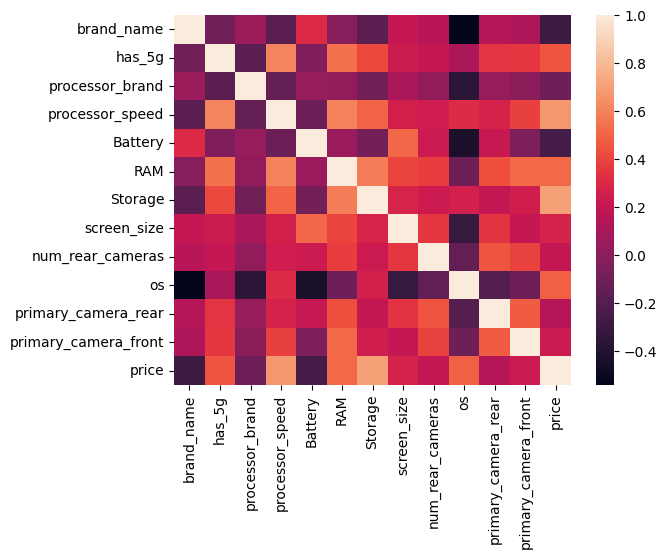

In [12]:
 sns.heatmap(data_label_encoded.corr())

In [16]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,has_5g,0.448770
1,processor_brand,-0.105830
2,processor_speed,0.670760
3,Battery,-0.257161
4,RAM,0.516667
5,Storage,0.701260
6,screen_size,0.275665
7,num_rear_cameras,0.199792
8,os,0.483840
9,primary_camera_rear,0.147504


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
3,processor_speed,0.480102
6,Storage,0.144949
7,screen_size,0.093265
11,primary_camera_front,0.084063
8,num_rear_cameras,0.044966
0,brand_name,0.036560
4,Battery,0.035014
5,RAM,0.032814
9,os,0.016802
10,primary_camera_rear,0.014674


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
3,processor_speed,0.427367
6,Storage,0.187985
7,screen_size,0.100137
11,primary_camera_front,0.077528
8,num_rear_cameras,0.047318
0,brand_name,0.047310
4,Battery,0.029688
5,RAM,0.028708
2,processor_brand,0.021470
9,os,0.017936


In [19]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
3,processor_speed,0.571500
11,primary_camera_front,0.196970
7,screen_size,0.132605
8,num_rear_cameras,0.073879
6,Storage,0.044997
5,RAM,0.033125
0,brand_name,0.028878
4,Battery,0.021563
1,has_5g,0.011998
2,processor_brand,0.008351


In [20]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
9,os,10741.111179
6,Storage,9769.113150
7,screen_size,8475.063987
3,processor_speed,7163.461665
5,RAM,3713.808110
2,processor_brand,1986.881376
8,num_rear_cameras,1335.786735
1,has_5g,470.584662
0,brand_name,155.978452
10,primary_camera_rear,-598.067178


In [21]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
3,processor_speed,0.483948
6,Storage,0.132641
7,screen_size,0.101470
11,primary_camera_front,0.083447
8,num_rear_cameras,0.044377
0,brand_name,0.038582
4,Battery,0.036080
5,RAM,0.030882
9,os,0.015001
2,processor_brand,0.014256


In [23]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
9,os,10741.143935
6,Storage,9769.105555
7,screen_size,8475.082206
3,processor_speed,7163.453877
5,RAM,3713.830120
2,processor_brand,1986.901190
8,num_rear_cameras,1335.804685
1,has_5g,470.600307
0,brand_name,156.008975
10,primary_camera_rear,-598.085258


In [24]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ -932.40343204,   752.53309775,   956.91295384, ...,
         -930.00349729,   439.2309795 , -7865.07758915],
       [  215.90030581,  1526.49646439,   224.46149014, ...,
         -298.6361772 ,   143.7630449 , -1987.55420339],
       [ -604.81807714,  1617.57337953,    98.30306081, ...,
         -476.12257853,   239.84388341,  2747.22690546],
       ...,
       [-1776.13262991,   725.25635914, -1785.33072833, ...,
        -1020.90158941, -1079.31770612, -7968.03687309],
       [ -721.93556334,  1923.39846273,   387.30501347, ...,
         -279.30393599,   317.18427224,  2648.6664414 ],
       [-2275.18391878,   808.74915912,   198.17007241, ...,
        -1043.90698107, -2310.60108552, -3753.44806388]])

In [25]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
3,processor_speed,15228.229422
11,primary_camera_front,3009.246778
6,Storage,2947.008690
5,RAM,2678.544076
7,screen_size,2335.972435
4,Battery,1335.790326
1,has_5g,1208.513298
8,num_rear_cameras,1178.570729
0,brand_name,1156.576279
9,os,794.915802


In [26]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [27]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
has_5g,0.448770,0.004643,0.007169,0.011998,470.584662,0.005295,470.600307,1208.513298
processor_brand,-0.105830,0.012149,0.021470,0.008351,1986.881376,0.014256,1986.901190,510.158704
processor_speed,0.670760,0.480102,0.427367,0.571500,7163.461665,0.483948,7163.453877,15228.229422
Battery,-0.257161,0.035014,0.029688,0.021563,-6325.412820,0.036080,-6325.431581,1335.790326
RAM,0.516667,0.032814,0.028708,0.033125,3713.808110,0.030882,3713.830120,2678.544076
Storage,0.701260,0.144949,0.187985,0.044997,9769.113150,0.132641,9769.105555,2947.008690
screen_size,0.275665,0.093265,0.100137,0.132605,8475.063987,0.101470,8475.082206,2335.972435
num_rear_cameras,0.199792,0.044966,0.047318,0.073879,1335.786735,0.044377,1335.804685,1178.570729
os,0.483840,0.016802,0.017936,0.006856,10741.111179,0.015001,10741.143935,794.915802


In [28]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [29]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
processor_speed,0.489802
Storage,0.123904
primary_camera_front,0.105799
screen_size,0.100282
num_rear_cameras,0.049336
RAM,0.042172
Battery,0.033346
os,0.016633
processor_brand,0.014729


In [30]:
# to drop primary_camera_rear, has_5g, processor_brand,os
X_label

,brand_name,has_5g,processor_brand,processor_speed,Battery,RAM,Storage,screen_size,num_rear_cameras,os,primary_camera_rear,primary_camera_front
0,27.0,1,9.0,3.2,5000,12,256,6.7,3,0.0,50.0,16.0
1,27.0,1,9.0,2.2,5000,6,128,6.6,3,0.0,64.0,16.0
2,34.0,1,2.0,2.4,5000,4,64,6.6,3,0.0,50.0,13.0
3,23.0,1,9.0,2.2,5000,6,128,6.6,3,0.0,50.0,16.0
4,31.0,1,1.0,2.6,5000,6,128,6.7,3,0.0,108.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
966,23.0,1,9.0,3.0,5000,8,128,6.7,3,0.0,64.0,16.0
967,8.0,1,9.0,2.2,5000,6,128,6.5,3,0.0,48.0,8.0
968,30.0,1,1.0,2.8,5080,8,256,6.6,3,0.0,64.0,16.0
969,23.0,1,9.0,2.2,5000,6,128,6.8,3,0.0,108.0,32.0


In [31]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [32]:
scores.mean()

0.8949227125198418

In [52]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['os','processor_brand', 'primary_camera_rear', 'has_5g']), y_label, cv=5, scoring='r2')

In [53]:
scores.mean()

0.8902954541251074

In [54]:
df.drop(columns=['os'])

,brand_name,has_5g,processor_brand,processor_speed,Battery,RAM,Storage,screen_size,num_rear_cameras,primary_camera_rear,primary_camera_front,price
0,oneplus,1,snapdragon,3.2,5000,12,256,6.7,3,50.0,16.0,54999
1,oneplus,1,snapdragon,2.2,5000,6,128,6.6,3,64.0,16.0,19989
2,samsung,1,exynos,2.4,5000,4,64,6.6,3,50.0,13.0,16499
3,motorola,1,snapdragon,2.2,5000,6,128,6.6,3,50.0,16.0,14999
4,realme,1,dimensity,2.6,5000,6,128,6.7,3,108.0,16.0,24999
...,...,...,...,...,...,...,...,...,...,...,...,...
966,motorola,1,snapdragon,3.0,5000,8,128,6.7,3,64.0,16.0,34990
967,honor,1,snapdragon,2.2,5000,6,128,6.5,3,48.0,8.0,14990
968,poco,1,dimensity,2.8,5080,8,256,6.6,3,64.0,16.0,28990
969,motorola,1,snapdragon,2.2,5000,6,128,6.8,3,108.0,32.0,19990
